In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import statsmodels.api as sm

price = pd.read_table('pricelist.csv',delimiter =';')
combi = pd.read_table('Historical_combi2.csv',delimiter =';')
I_2011 = pd.read_table('UralMED_2014.csv',delimiter =';')

combi=combi.fillna(0)

In [52]:
I_2011

,Pred Year,Pred brent 2014,Pred FO 1% 2014,Pred FO 3.5% 2014,TD 2014,Actual 2014,MD 2014
0,2008,75.0,-13.96,-21.85,-3.38,-1,-4.67
1,2009,71.0,-13.27,-18.76,-3.81,-1,-3.30
2,2010,82.5,-8.44,-14.03,-2.87,-1,-3.57
3,2011,100.0,1.37,-4.22,-1.99,-1,-3.68
4,2012,100.0,-6.84,-11.13,-1.32,-1,-2.77
5,2013,100.0,-7.03,-12.15,-1.39,-1,-2.30


In [53]:
import datetime
datetimes = [datetime.datetime.strptime(d, '%d.%m.%Y') for d in combi["Date"]]


df = pd.DataFrame(datetimes, columns=['date'])
df.loc[:, 'date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

combi = combi.assign(df=df['date'].values)
#print(combi)


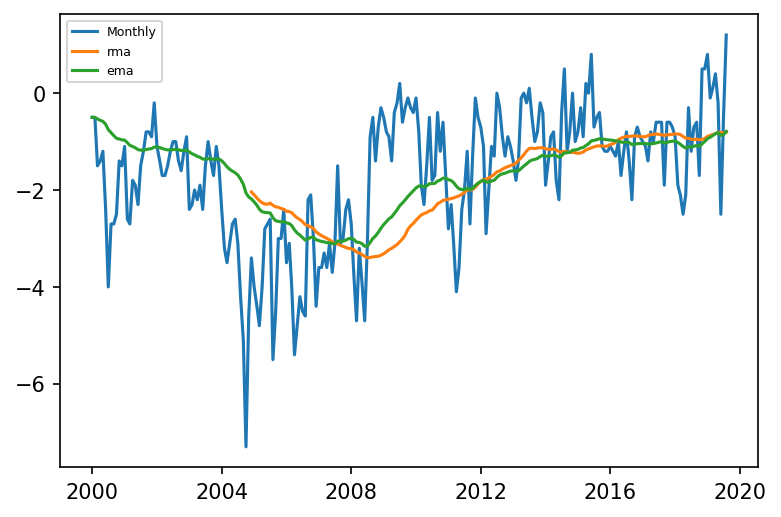

In [54]:
plt.rcParams['figure.dpi'] = 150

rma60 = combi["Urals MED"].rolling(window=60).mean()
ema60 = combi["Urals MED"].ewm(span=60, adjust=False).mean()
plt.plot(combi["df"],combi["Urals MED"])
plt.plot(combi["df"],rma60)
plt.plot(combi["df"],ema60)
plt.legend(("Monthly","rma","ema"))
plt.show()

combi = combi.assign(ema60=ema60.values)
combi = combi.assign(rma60=rma60.values)

In [55]:
take = 2014

In [56]:
if take==2011: 
    ema=[combi[combi['df']=='2005-01-01']['ema60'].values,combi[combi['df']=='2006-01-01']['ema60'].values   \
     ,combi[combi['df']=='2007-01-01']['ema60'].values,combi[combi['df']=='2008-01-01']['ema60'].values  \
     ,combi[combi['df']=='2009-01-01']['ema60'].values,combi[combi['df']=='2010-01-01']['ema60'].values]
    
elif take==2012:
        ema=[combi[combi['df']=='2006-01-01']['ema60'].values,combi[combi['df']=='2007-01-01']['ema60'].values   \
     ,combi[combi['df']=='2008-01-01']['ema60'].values,combi[combi['df']=='2009-01-01']['ema60'].values  \
     ,combi[combi['df']=='2010-01-01']['ema60'].values,combi[combi['df']=='2011-01-01']['ema60'].values]
    
elif take==2013:
    ema=[combi[combi['df']=='2007-01-01']['ema60'].values,combi[combi['df']=='2008-01-01']['ema60'].values   \
     ,combi[combi['df']=='2009-01-01']['ema60'].values,combi[combi['df']=='2010-01-01']['ema60'].values  \
     ,combi[combi['df']=='2011-01-01']['ema60'].values,combi[combi['df']=='2012-01-01']['ema60'].values]
    
else:
    ema=[combi[combi['df']=='2008-01-01']['ema60'].values,combi[combi['df']=='2009-01-01']['ema60'].values   \
     ,combi[combi['df']=='2010-01-01']['ema60'].values,combi[combi['df']=='2011-01-01']['ema60'].values  \
     ,combi[combi['df']=='2012-01-01']['ema60'].values,combi[combi['df']=='2013-01-01']['ema60'].values]
    
ema

[array([-2.99532504]),
 array([-2.71364236]),
 array([-1.95552615]),
 array([-1.786797]),
 array([-1.81996747]),
 array([-1.60409501])]

In [57]:
if take==2011: 
    rma=[combi[combi['df']=='2005-01-01']['rma60'].values,combi[combi['df']=='2006-01-01']['rma60'].values   \
     ,combi[combi['df']=='2007-01-01']['rma60'].values,combi[combi['df']=='2008-01-01']['rma60'].values  \
     ,combi[combi['df']=='2009-01-01']['rma60'].values,combi[combi['df']=='2010-01-01']['rma60'].values]
    
elif take==2012:
        rma=[combi[combi['df']=='2006-01-01']['rma60'].values,combi[combi['df']=='2007-01-01']['rma60'].values   \
     ,combi[combi['df']=='2008-01-01']['rma60'].values,combi[combi['df']=='2009-01-01']['rma60'].values  \
     ,combi[combi['df']=='2010-01-01']['rma60'].values,combi[combi['df']=='2011-01-01']['rma60'].values]
    
elif take==2013:
    rma=[combi[combi['df']=='2007-01-01']['rma60'].values,combi[combi['df']=='2008-01-01']['rma60'].values   \
     ,combi[combi['df']=='2009-01-01']['rma60'].values,combi[combi['df']=='2010-01-01']['rma60'].values  \
     ,combi[combi['df']=='2011-01-01']['rma60'].values,combi[combi['df']=='2012-01-01']['rma60'].values]
    
else:
    rma=[combi[combi['df']=='2008-01-01']['rma60'].values,combi[combi['df']=='2009-01-01']['rma60'].values   \
     ,combi[combi['df']=='2010-01-01']['rma60'].values,combi[combi['df']=='2011-01-01']['rma60'].values  \
     ,combi[combi['df']=='2012-01-01']['rma60'].values,combi[combi['df']=='2013-01-01']['rma60'].values]

rma

[array([-3.21]),
 array([-3.315]),
 array([-2.62333333]),
 array([-2.19]),
 array([-1.825]),
 array([-1.475])]

In [58]:
X = combi[['Dubai','FO 3.5%','FO 1%']]
Y = combi['Urals MED']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)





Intercept: 
 -0.40591260047150324
Coefficients: 
 [ 0.38378897 -0.03699875  0.10541675]
                            OLS Regression Results                            
Dep. Variable:              Urals MED   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     96.39
Date:                Thu, 26 Sep 2019   Prob (F-statistic):           1.53e-40
Time:                        11:39:44   Log-Likelihood:                -315.71
No. Observations:                 236   AIC:                             639.4
Df Residuals:                     232   BIC:                             653.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [59]:
input_2011 = pd.read_table('pred_Dubai2014.csv',delimiter =',')

Du = input_2011.iloc[:,1]
FO35= I_2011["Pred FO 3.5% 2014"]
FO1= I_2011["Pred FO 1% 2014"]
linear_UralM=regr.intercept_+ regr.coef_[0]*Du + regr.coef_[1]*FO35 + regr.coef_[2]*FO1
print(linear_UralM)

0   -2.827459
1   -2.566397
2   -1.766353
3   -0.153956
4   -1.342583
5   -1.431672
dtype: float64


In [60]:
Du = input_2011.iloc[:,2]
nonlinear_UralM =  0.291421970876107*Du - 1.22717033972297 - 0.0966332745321596*FO35 - 0.0127575394587934*Du*FO1 - 0.00680646224957921*np.power(FO1,2)


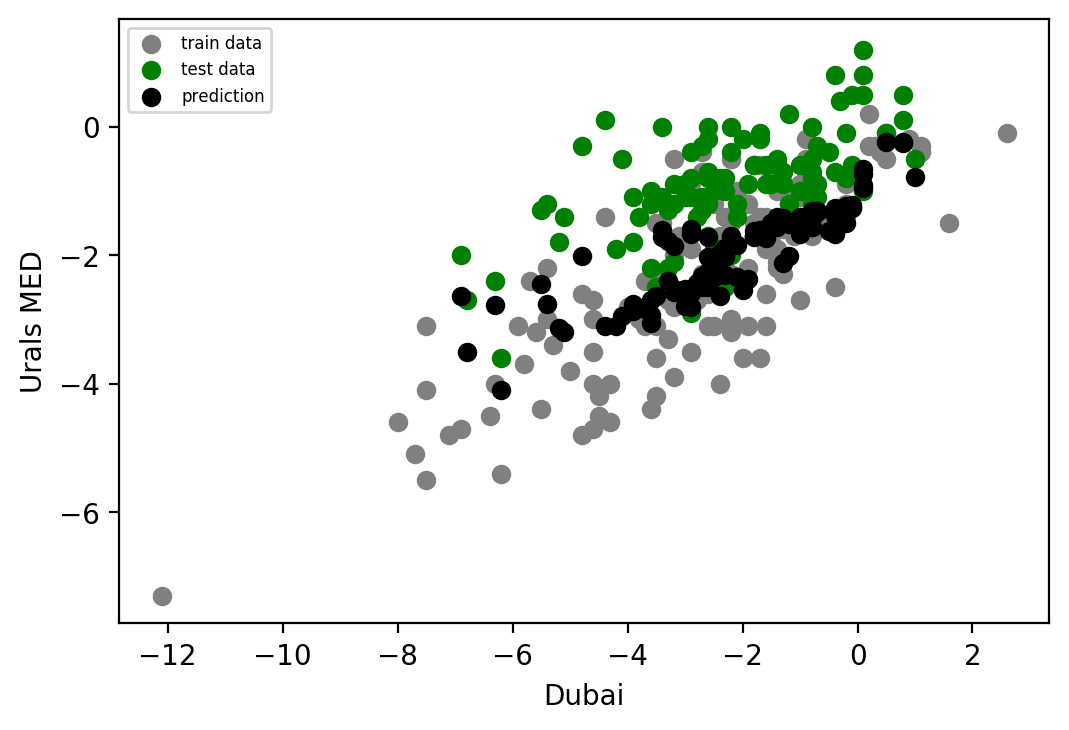

Mean squared error: 0.27
Feature ranking:
Feature Dubai (0.334609)
Feature FO 1% (0.384770)
Feature FO 3.5% (0.280621)


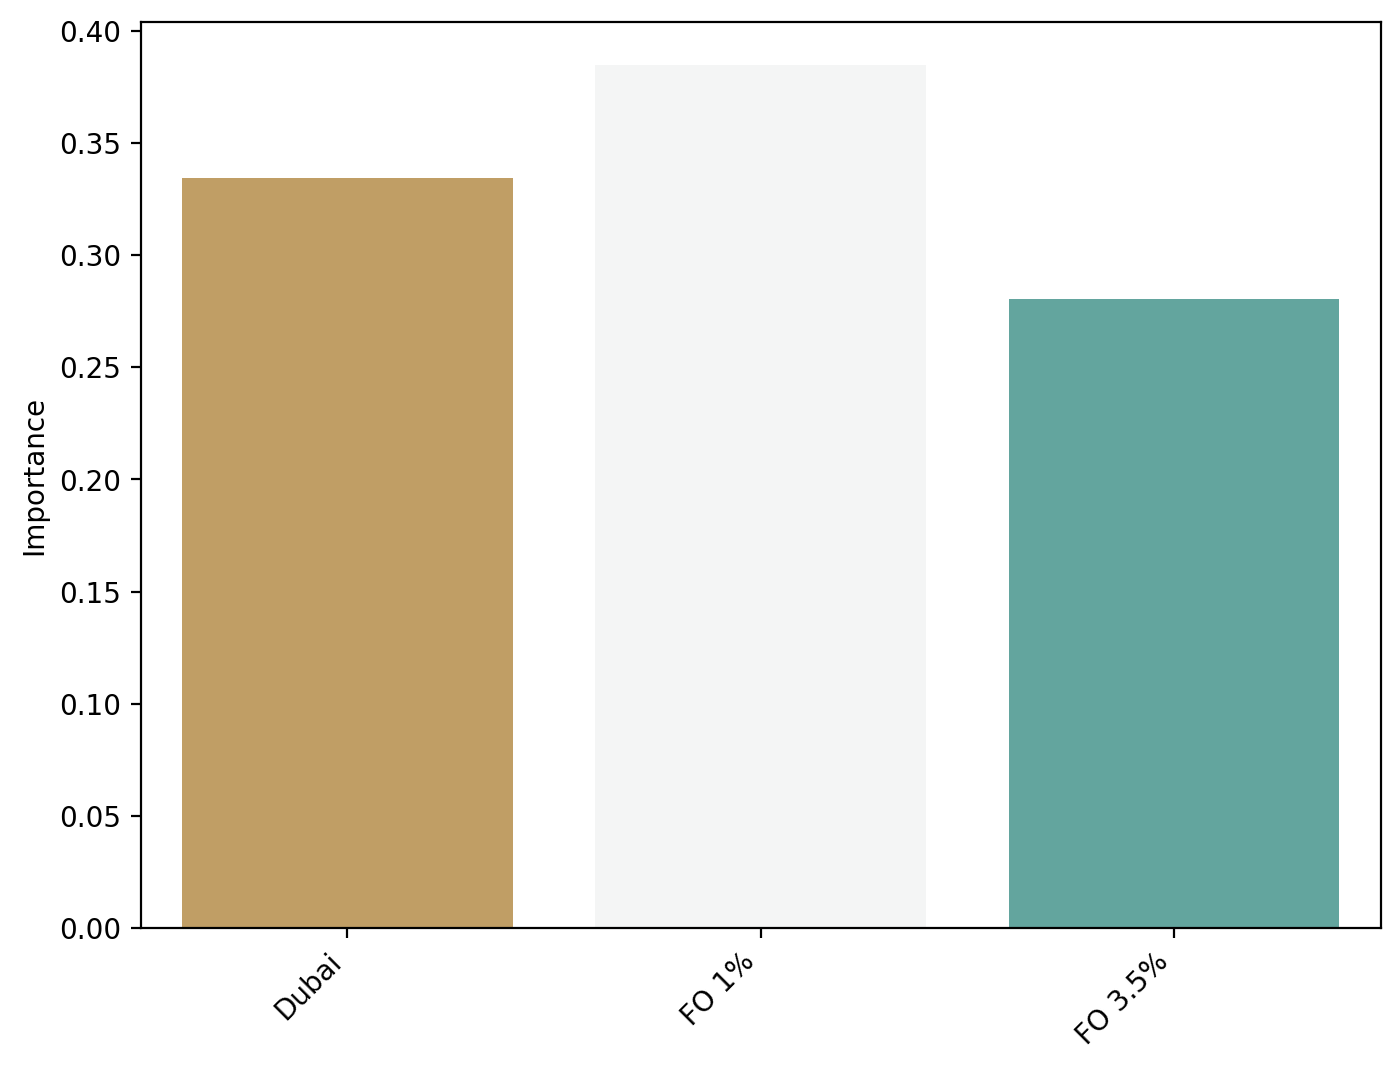

In [61]:
train_combi = combi.iloc[:-100,1:]
test_combi = combi.iloc[-100:,1:]

plt.rcParams['figure.dpi'] = 200

#x_train=train_combi.drop("Maya Europe",axis=1)
#x_train=train_combi[train_combi.columns.difference(["Mars"])]
x_train=train_combi[["Dubai","FO 1%", "FO 3.5%"]]
y_train=train_combi["Urals MED"]

#df.drop('b', axis=1)

#x_test=train_combi.drop("Maya Europe",axis=1)
#x_test=test_combi[test_combi.columns.difference(["Mars"])]
x_test=test_combi[["Dubai","FO 1%", "FO 3.5%"]]
y_test=test_combi["Urals MED"].to_frame()



regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train["Dubai"],y_train,   color='grey')
plt_test=plt.scatter(x_test["Dubai"],y_test,   color='green')
plt_pred=plt.scatter(x_test["Dubai"], y_pred,  color='black')



plt.xlabel("Dubai")
plt.ylabel("Urals MED")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);




In [63]:
#data_df = price[['Dated brent','FO 3.5%','FO 1%']]

Du = input_2011.iloc[:,3]
data_df = pd.concat([Du, FO1,FO35],axis=1)
y_pred=regressor.predict(data_df)
y_pred= pd.DataFrame(y_pred)
print(y_pred)

          0
0 -2.913591
1 -2.780752
2 -1.864755
3 -0.242429
4 -2.277916
5 -2.133614


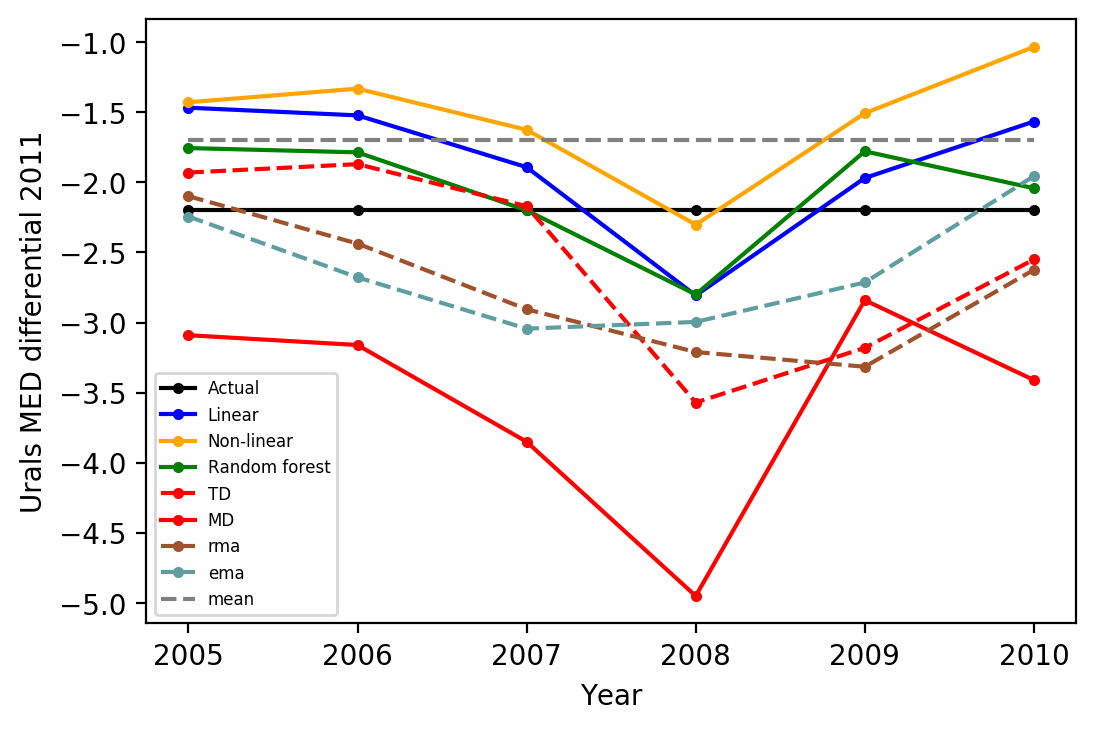

In [22]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2011"],'k.-')
plt.plot(I_2011["Pred Year"],linear_UralM,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_UralM,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2011"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2011"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-1.7,-1.7],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('Urals MED differential 2011')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))


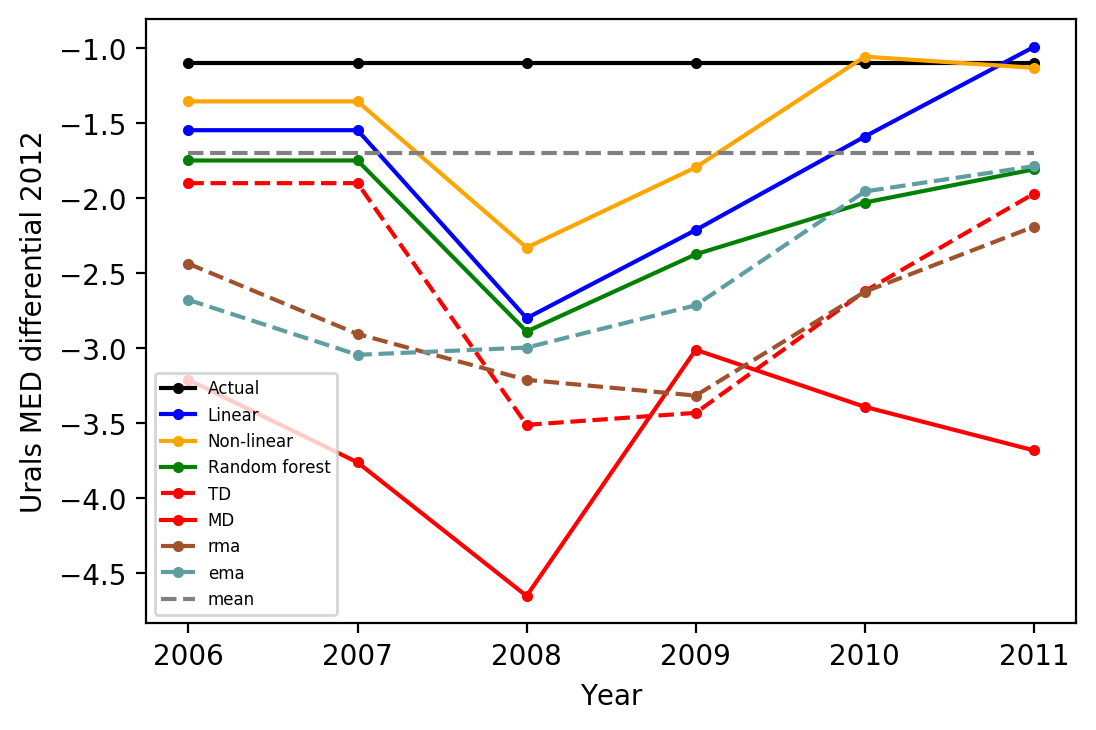

In [36]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2012"],'k.-')
plt.plot(I_2011["Pred Year"],linear_UralM,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_UralM,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2012"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2012"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-1.7,-1.7],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('Urals MED differential 2012')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))


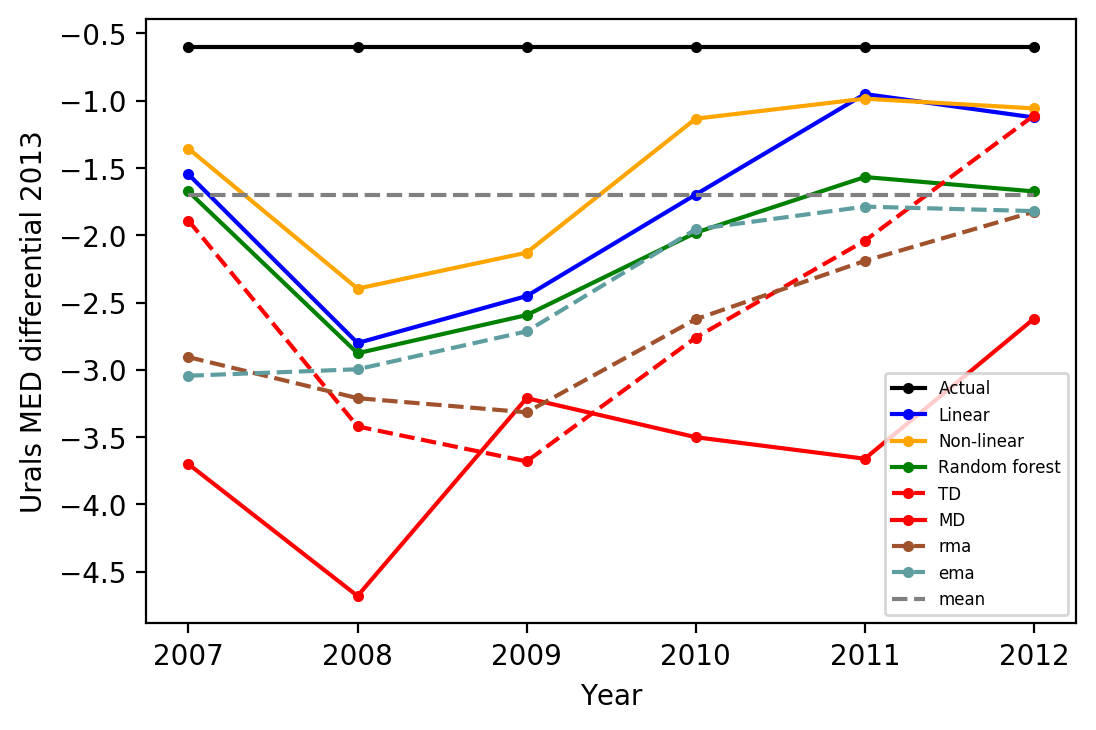

In [50]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2013"],'k.-')
plt.plot(I_2011["Pred Year"],linear_UralM,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_UralM,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2013"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2013"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-1.7,-1.7],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('Urals MED differential 2013')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))


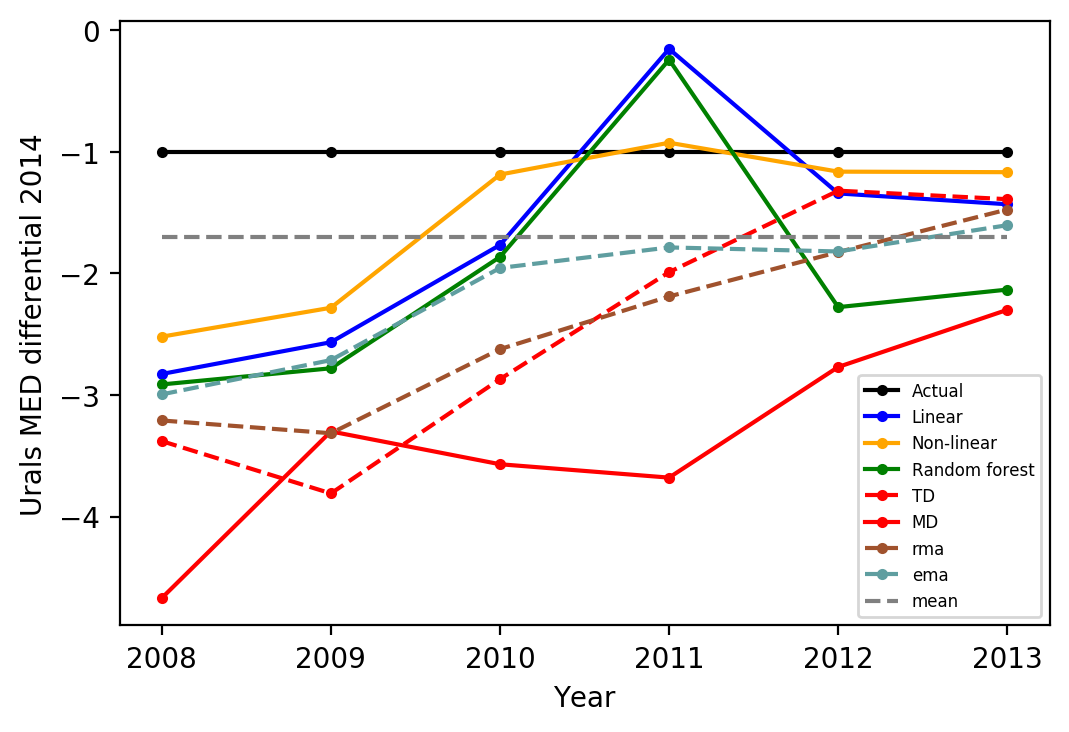

In [64]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2014"],'k.-')
plt.plot(I_2011["Pred Year"],linear_UralM,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_UralM,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2014"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2014"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-1.7,-1.7],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('Urals MED differential 2014')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))
